In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

from scipy.stats import t, f, norm
import statsmodels.api as sm

#                                                     Задача 1

In [37]:
n = 50
alpha = 0.05

In [38]:
def csi():
    # Generate 50 random numbers from a uniform distribution
    global n
    return np.random.uniform(-1, 1, n)

In [39]:
data = np.array([np.ones(n), csi(), csi(), csi(), csi(), csi()])
genuine_coefs = np.array([2, 3, -2, 1, 1, -1])
s = len(genuine_coefs)
etta = np.random.normal(genuine_coefs @ data, 1.5 ** 2)
psi = data.T
# print(psi)

## a) Проверка переменных кси_k на мультиколлинеарность

In [40]:
data_pd = pd.DataFrame(psi)
# print(data_pd)
correlation_matrix = data_pd.corr()
# print(correlation_matrix)
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True)
# plt.title('Correlation Matrix Heatmap for features')
# plt.show()
# None

In [71]:
# Define an empty list to store R2 values
r2_values = []

# Your code to calculate R2 values (shown partially here)
model = LinearRegression(fit_intercept=True)
for i in range(1, psi.shape[1]): # psi.shape[1] = 6
    X = np.delete(psi, i, axis=1)
    # print(X)
    y = psi.T[i]
    
    F = X.T @ X
    F_inv = np.linalg.inv(F)
    b = F_inv @ X.T @ y
    
    RSS = np.sum((y - b @ X.T) ** 2)
    TSS = np.sum((y - y.mean()) ** 2)
    R2 = (TSS - RSS) / TSS
    
    if R2 >= 0.7:
        print(i, 'R^2:', R2, "существенно связан, и обЬясняется с остальными факторами")
    else:
        print(i, 'R^2:', R2, "независим")
        
    r2_values.append(R2)

# Reshape R2 values array for a heatmap
# r2_matrix = np.array(r2_values).reshape(1, -1)

# # Create a heatmap with R2 values
# plt.figure(figsize=(10, 8))
# sns.heatmap(r2_matrix, annot=True, cmap='coolwarm', square=True, xticklabels=list(range(1, psi.shape[1])))
# plt.xlabel('Feature Index')
# plt.ylabel('R2 Value')
# plt.title('R2 Values Heatmap')
# plt.show()

1 R^2: 0.011647439714649927 независим
2 R^2: 0.03430492697344012 независим
3 R^2: 0.09491253591957688 независим
4 R^2: 0.04163989530683063 независим
5 R^2: 0.08043992376363852 независим


## b) Определение уравнения линейной регресии и проверка значимости коэффициентов

In [42]:
F = psi.T @ psi
F_inv = np.linalg.inv(F)
b = F_inv @ psi.T @ etta


# Create index for the coefficients
index = np.arange(len(b))

# Define width of bar
bar_width = 0.35

# Create bar plot for coefficients
# plt.figure(figsize=(10, 6))
# plt.bar(index, b, bar_width, label='My Coefficients', color='b')
# plt.bar(index + bar_width, genuine_coefs, bar_width, label='Genuine Coefficients', color='r')

# plt.xlabel('Coefficient Index')
# plt.ylabel('Coefficient Value')
# plt.title('Comparison of My Coefficients and Genuine Coefficients')
# plt.xticks(index + bar_width, range(len(b)))
# plt.legend()

# plt.show()

# Create a pandas DataFrame to display the coefficients
# coefficients_df = pd.DataFrame({'My Coefficients': np.round(b, 1), 'Genuine Coefficients': genuine_coefs})
coefficients_df = pd.DataFrame({'Полученные коэффициенты': np.round(b, 1), 'Данные коэффициенты': genuine_coefs})
coefficients_df

,Полученные коэффициенты,Данные коэффициенты
0,2.5,2
1,3.0,3
2,-2.1,-2
3,0.5,1
4,0.7,1
5,-2.0,-1


In [43]:
# Fit the linear regression model
# model = LinearRegression(fit_intercept=True)
# model.fit(psi, etta)

# coefs = np.zeros(s)
# coefs[0] = np.round(model.intercept_, 1)
# coefs[1:] = np.round(model.coef_, 1)[1:]

# Create a pandas DataFrame to display the coefficients
# coefficients_df = pd.DataFrame({'Sklearn coefficients': np.round(coefs, 1), 'My Coefficients': np.round(b, 1), 'Genuine Coefficients': genuine_coefs})
# coefficients_df

In [44]:
etta_pred = b @ psi.T
RSS = np.sum((etta_pred - etta) ** 2)
# print("RSS:", np.round(RSS, 2))

In [45]:
p = b.shape[0] # count of coefficients

deltas_sign = b / np.sqrt(RSS * F_inv.diagonal()) * np.sqrt(n - p)
# p_value = 2 * (1 - t.cdf(np.abs(deltas_sign), n - p))
p_value = 2 * t.cdf(-np.abs(deltas_sign), n - p)
pd_df = pd.DataFrame({'Delta': np.round(deltas_sign, 2), 'p_value': p_value, 'Значимость' : p_value < alpha})
pd_df

,Delta,p_value,Значимость
0,6.59,4.496434e-08,True
1,5.15,5.904609e-06,True
2,-3.29,1.999223e-03,True
3,0.78,4.402665e-01,False
4,1.26,2.140389e-01,False
5,-2.76,8.393992e-03,True


## c) Определения коэффициента детерминации и проверка его значимости

In [46]:
TSS = np.sum((etta - np.mean(etta)) ** 2)
# print("TSS:", np.round(TSS))

In [47]:
R2 = (TSS - RSS) / TSS
print("R^2 =", np.round(R2, 3))

R^2 = 0.551


In [48]:
delta = R2 / (1 - R2) * (n - p) / (p - 1)
print("delta:",np.round(delta, 2))

p_value = f.cdf(-np.abs(delta), p - 1, n - p) + (1 - f.cdf(np.abs(delta), p - 1, n - p))
print("p_value:", p_value)
if (p_value < alpha):
    print("Регрессия значима")
else:
    print("Нет оснований отвергать гипотезу о незначимости регрессии")

delta: 10.79
p_value: 8.237836545132993e-07
Регрессия значима


## d) Нахождения значения в точке x_k=0 и построение 95% доверительного интервала

In [49]:
x0 = np.zeros(6)
x0[0] = 2
x_pred = b @ x0
kappa = np.sqrt(1 + x0 @ F_inv @ x0.T)
t1 = t.cdf(alpha, n - p)
t2 = t.cdf(1 - alpha, n - p)

etta1 = x_pred - t1 * kappa * np.sqrt(RSS  / (n - p))
etta2 = x_pred + t2 * kappa * np.sqrt(RSS  / (n - p))

print('Доверительный интервал:', np.round(etta1, 2), "<", np.round(x_pred, 2), "<", np.round(etta2, 2))

Доверительный интервал: 3.69 < 5.01 < 7.12


## e) Проверка предположения о независимости ошибок измерения

In [50]:
errors = etta - etta_pred

In [51]:
def merge_sort(arr):
    """
    Funciton which calculates count of invertions and sorts an array
    """
    # Helper function to merge two sorted arrays and count inversions
    def merge(left, right):
        merged = []
        count = 0
        i = j = 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                merged.append(left[i])
                i += 1
            else:
                # Element from the right array is smaller, so it's an inversion
                merged.append(right[j])
                count += len(left) - i
                j += 1

        merged.extend(left[i:])
        merged.extend(right[j:])
        
        return merged, count

    if len(arr) <= 1:
        return arr, 0

    mid = len(arr) // 2
    left, inv_left = merge_sort(arr[:mid])
    right, inv_right = merge_sort(arr[mid:])

    merged, count = merge(left, right)

    return merged, count + inv_left + inv_right

In [52]:
errors_sorted, inversion_count = merge_sort(errors)
print("Число инверсий = ", inversion_count)

Число инверсий =  525


In [53]:
delta = (inversion_count - n * (n - 1) / 4) * np.sqrt(36 / n**3)
print("delta:", np.round(delta, 2))

p_value = 2 * (1 - norm.cdf(np.abs(delta), 0, 1))
print("p-value:", np.round(p_value, 3))
if (p_value < alpha):
    print("Выборка не случайная")
else:
    print("Нет оснований отвергать гипотезу о случайности выборки")

delta: -1.48
p-value: 0.138
Нет оснований отвергать гипотезу о случайности выборки


## f) Проверка предположения о нормальности распределения ошибок

In [54]:
# Number of bootstrap samples
n_samples = 10000

In [55]:
# Calculate the empirical function (CDF)
F_n = np.arange(1, n + 1) / n

# Plot the empirical function
# plt.step(errors_sorted, F_n, where='post')
# plt.title('Empirical Function of the Distribution')
# plt.xlabel('Data')
# plt.ylabel('Probability')
# plt.show()

In [56]:
# ecdf = sm.distributions.ECDF(errors)

# Create plot points for the ECDF
# x = np.linspace(min(errors), max(errors))
# F_n_ecdf = ecdf(x)

# Plot the empirical function
# plt.step(errors_sorted, F_n_ecdf, where='post')
# plt.title('Empirical Function of the Distribution')
# plt.xlabel('Data')
# plt.ylabel('Probability')
# plt.show()

In [57]:
# Generate bootstrap samples and calculate the delta for each sample
def delta(sample):    
    global F_n, n
    delta = np.sqrt(n) * np.max(np.abs(F_n - norm.cdf(sample, 0, np.var(sample))))
    return delta


deltas = np.array([delta(np.random.choice(errors, size=n, replace=True)) for _ in range(n_samples)])
print("Средне-арифметическое значение бутстрапа:", np.round(deltas.mean(), 2))

wave_delta = delta(errors)
print("Значение дельта с волной:", np.round(wave_delta, 2))

Средне-арифметическое значение бутстрапа: 5.09
Значение дельта с волной: 4.23


In [58]:
p_value = np.sum(deltas >= wave_delta) / n_samples
print("p-value:", np.round(p_value, 2))
if (p_value < alpha):
    print("Ошибки не имеют нормального распределения")
else:
    print("Нет оснований отвергать гипотезу о том, что ошибки имеют нормального распределения")

p-value: 0.96
Нет оснований отвергать гипотезу о том, что ошибки имеют нормального распределения


## g) Исследование регресии на выбросы

Число выбросов: 1
Выбросы: [-6.81]


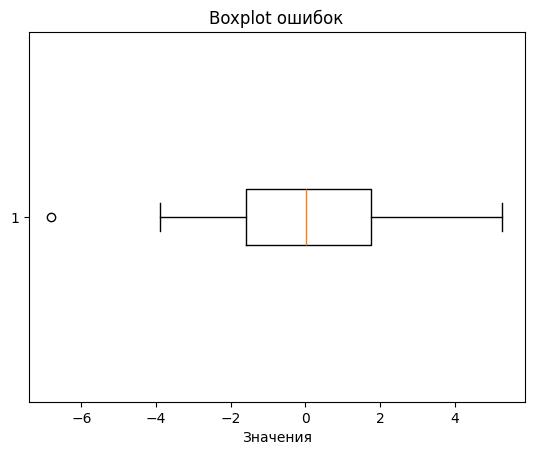

In [59]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot with the random data
boxplot = ax.boxplot(errors, vert=False)

outliers = boxplot['fliers'][0].get_data()[0]

# Count the outliers
outliers_count = len(outliers)
print("Число выбросов:", outliers_count)
print("Выбросы:", np.round(outliers, 2))

# Set labels and title
ax.set_xlabel('Значения')
ax.set_title('Boxplot ошибок')

# Show the plot
plt.show()

## h) Кросс-проверка регрессии

In [60]:
from sklearn.model_selection import KFold
import numpy as np


# Initialize KFold with the number of splits (k) you want
kf = KFold(n_splits=n, shuffle=False)

RSS_CV = []
# Iterate over the splits to get training and validation indices
for train_index, val_index in kf.split(psi):
    X_train, X_val = psi[train_index], psi[val_index]
    y_train, y_val = etta[train_index], etta[val_index]
    
    F = X_train.T @ X_train
    F_inv = np.linalg.inv(F)
    b = F_inv @ X_train.T @ y_train

    RSS_CV.append(np.sum((b @ X_val[0] - y_val) ** 2))
    
RSS_CV = np.array(RSS_CV)
CVSS = np.sum(RSS_CV)
R2_CV = (TSS - CVSS) / TSS

print("R2-CV:", np.round(R2_CV, 2))
if R2_CV > 0.5:
    print("Удачная модель")
else:
    print("Неудачная модель")


R2-CV: 0.43
Неудачная модель


## i) Проверка адекватности регрессии, сделав 5 повторных измерений в одной точке

In [61]:
k = 5
X = np.array([1, 1, 0, 1, -1, 0])
y = np.array([np.random.normal(genuine_coefs @ X, 1.5 ** 2) for _ in range(k)])

In [62]:
S2 = 1 / (k - 1) * np.sum((y - y.mean()) ** 2)
delta = RSS / (n - p) / S2
print("Delta:", np.round(delta, 2))

p_value = f.cdf(-np.abs(delta), n - p, k - 1) + (1 - f.cdf(np.abs(delta), n - p, k - 1))
print("p-value:", np.round(p_value, 2))
if (p_value < alpha):
    print("Модель не адекватная")
else:
    print("Нет основания отвергать гипотезу -> модель адекватная")

Delta: 1.89
p-value: 0.28
Нет основания отвергать гипотезу -> модель адекватная


## Удаление переменной, соответствующей наименее значимому коэффициенту и повторение пунктов b и c, сравнения уравнения регрессии

In [63]:
unsignificant_coef = np.argmin(deltas_sign)
print("Наименее значимый коэффициент -", unsignificant_coef)

Наименее значимый коэффициент - 2


In [64]:
data_new = np.delete(data, unsignificant_coef, axis=0)
genuine_coefs_new = np.delete(genuine_coefs, unsignificant_coef)
etta_new = np.random.normal(genuine_coefs_new @ data_new, 1.5 ** 2)
psi_new = data_new.T

In [65]:
F_new = psi_new.T @ psi_new
F_inv_new = np.linalg.inv(F_new)
b_new = F_inv_new @ psi_new.T @ etta_new

# Create index for the coefficients
index = np.arange(len(b_new))

# Define width of bar
bar_width = 0.35

# Create bar plot for coefficients
# plt.figure(figsize=(10, 6))
# plt.bar(index, b_new, bar_width, label='My Coefficients', color='b')
# plt.bar(index + bar_width, np.delete(genuine_coefs, unsignificant_coef), bar_width, label='Genuine Coefficients', color='r')

# plt.xlabel('Coefficient Index')
# plt.ylabel('Coefficient Value')
# plt.title('Comparison of My Coefficients and Genuine Coefficients')
# plt.xticks(index + bar_width, range(len(b_new)))
# plt.legend()

# plt.show()

pd_df = pd.DataFrame({'Полученные новые коэффициенты':  np.round(b_new, 1), 'Данные коэффициенты': np.delete(genuine_coefs, unsignificant_coef)})
pd_df

,Полученные новые коэффициенты,Данные коэффициенты
0,2.0,2
1,1.8,3
2,0.9,1
3,0.4,1
4,-1.0,-1


In [66]:
TSS_new = np.sum((etta_new - np.mean(etta_new)) ** 2)
# print("New TSS:", np.round(TSS_new, 2))

etta_pred_new = b_new @ psi_new.T
RSS_new = np.sum((etta_pred_new - etta_new) ** 2)
# print("New RSS:", np.round(RSS_new, 2))

In [67]:
R2_new = (TSS_new - RSS_new) / TSS_new
print("New R2:", np.round(R2_new, 4))
print("R2", np.round(R2, 4))

if R2_new >= R2:
    print("Объясняющая способность новой модели лучше")
else:
    print("Объясняющая способность новой модели хуже")

New R2: 0.3391
R2 0.5507
Объясняющая способность новой модели хуже


In [73]:
l = p - 1
#delta = R2 / (1 - R2) * (n - p) / (p - l)
delta = (RSS_new - RSS) / RSS * (n - p) / (p - l)
print("Delta:", np.round(delta, 2))

p_value = f.cdf(-np.abs(delta), p - l, n - p) + (1 - f.cdf(np.abs(delta), p - l, n - p))
print("p-value:", p_value)
if (p_value < alpha):
    print("Короткая модель плохая")
else:
    print("Нет оснований отвергать -> Короткая модель хорошая")

Delta: 662.81
p-value: 1.1102230246251565e-16
Короткая модель плохая


## Сравнение уравнения регрессии бутстрапом